In [1]:
!pip3 install --upgrade pip

In [74]:
import pandas as pd

In [75]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
Invest  = pd.read_csv('final_transactions_dataset.csv')

In [77]:
Invest1 = Invest[0:200000]


In [78]:
Invest1.describe

<bound method NDFrame.describe of         Unnamed: 0 company  sector  horizon (days)  amount date_BUY_fix  \
0                0     BBY  RETAIL               2     100   2017-05-25   
1                1     BAC    BANK             330   15000   2016-11-22   
2                2     AXP    BANK               7    3000   2016-09-27   
3                3     KSS  RETAIL               5   20000   2016-10-11   
4                4     JPM    BANK             360   15000   2015-03-12   
...            ...     ...     ...             ...     ...          ...   
199995      246667      GM    AUTO             120     500   2015-06-09   
199996      246668      GM    AUTO             150    1500   2014-03-04   
199997      246669     JPM    BANK             270    1500   2016-09-19   
199998      246670     HMC    AUTO              90    2000   2015-01-16   
199999      246671      DB    BANK              80    4000   2016-12-27   

       date_SELL_fix  price_BUY  price_SELL  Volatility_Buy  ... 

In [79]:
Return = Invest1['nominal_return']

In [80]:
Invest2 = Invest1.drop(['expected_return (yearly)','Unnamed: 0','company','sector','date_BUY_fix','date_SELL_fix','price_SELL','Volatility_sell','investment','Sharpe Ratio','PE_ratio','PS_ratio','PB_ratio'], axis = 1)

In [81]:
Invest2

,horizon (days),amount,price_BUY,Volatility_Buy,inflation,nominal_return,ESG_ranking,EPS_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,2,100,55.551804,0.383666,1.96,-0.037225,12.0,3.73,3.01,1.49,8.69,26.69
1,330,15000,18.616749,0.322809,-0.20,0.324317,26.3,1.26,15.70,0.92,0.67,5.54
2,7,3000,59.862297,0.238642,-0.20,-0.005756,19.8,5.64,15.68,1.91,3.39,25.78
3,5,20000,38.216724,0.428559,-0.20,-0.058388,12.9,3.27,3.17,1.60,4.41,11.35
4,360,15000,51.869335,0.194612,-0.50,0.003444,27.9,5.46,19.91,0.99,0.81,8.91
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,120,500,28.741871,0.224747,-0.50,-0.051145,30.6,2.70,2.98,1.22,2.53,11.97
199996,150,1500,28.542963,0.242287,-0.15,-0.078845,30.6,1.83,1.94,1.25,1.80,7.46
199997,270,1500,58.351299,0.253744,-0.20,0.326308,27.9,5.80,20.86,1.04,0.89,8.66
199998,90,2000,30.840000,0.191505,-0.50,0.136835,28.5,3.08,4.83,1.23,3.65,9.24


In [82]:
Invest2.shape

(200000, 12)

In [83]:
Return_A = Invest2.iloc[:,6].values


In [84]:
Return_A.shape

(200000,)

In [85]:
Return.shape

(200000,)

In [86]:
Invest3 =Invest2.drop(['nominal_return'], axis = 1)


In [87]:
Invest2.shape

(200000, 12)

In [88]:
Invest3.shape

(200000, 11)

In [89]:
Invest3

,horizon (days),amount,price_BUY,Volatility_Buy,inflation,ESG_ranking,EPS_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,2,100,55.551804,0.383666,1.96,12.0,3.73,3.01,1.49,8.69,26.69
1,330,15000,18.616749,0.322809,-0.20,26.3,1.26,15.70,0.92,0.67,5.54
2,7,3000,59.862297,0.238642,-0.20,19.8,5.64,15.68,1.91,3.39,25.78
3,5,20000,38.216724,0.428559,-0.20,12.9,3.27,3.17,1.60,4.41,11.35
4,360,15000,51.869335,0.194612,-0.50,27.9,5.46,19.91,0.99,0.81,8.91
...,...,...,...,...,...,...,...,...,...,...,...
199995,120,500,28.741871,0.224747,-0.50,30.6,2.70,2.98,1.22,2.53,11.97
199996,150,1500,28.542963,0.242287,-0.15,30.6,1.83,1.94,1.25,1.80,7.46
199997,270,1500,58.351299,0.253744,-0.20,27.9,5.80,20.86,1.04,0.89,8.66
199998,90,2000,30.840000,0.191505,-0.50,28.5,3.08,4.83,1.23,3.65,9.24


In [90]:
Invest3.shape

(200000, 11)

In [91]:
Invest3

,horizon (days),amount,price_BUY,Volatility_Buy,inflation,ESG_ranking,EPS_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,2,100,55.551804,0.383666,1.96,12.0,3.73,3.01,1.49,8.69,26.69
1,330,15000,18.616749,0.322809,-0.20,26.3,1.26,15.70,0.92,0.67,5.54
2,7,3000,59.862297,0.238642,-0.20,19.8,5.64,15.68,1.91,3.39,25.78
3,5,20000,38.216724,0.428559,-0.20,12.9,3.27,3.17,1.60,4.41,11.35
4,360,15000,51.869335,0.194612,-0.50,27.9,5.46,19.91,0.99,0.81,8.91
...,...,...,...,...,...,...,...,...,...,...,...
199995,120,500,28.741871,0.224747,-0.50,30.6,2.70,2.98,1.22,2.53,11.97
199996,150,1500,28.542963,0.242287,-0.15,30.6,1.83,1.94,1.25,1.80,7.46
199997,270,1500,58.351299,0.253744,-0.20,27.9,5.80,20.86,1.04,0.89,8.66
199998,90,2000,30.840000,0.191505,-0.50,28.5,3.08,4.83,1.23,3.65,9.24


In [92]:
Invest4 = Invest3.drop(['NetProfitMargin_ratio'], axis = 1)

In [93]:
Invest4.shape

(200000, 10)

In [94]:

Invest_A = Invest3.iloc[:,0:12].values


In [95]:
Invest_A[0:4]

array([[ 2.00000000e+00,  1.00000000e+02,  5.55518036e+01,
         3.83665561e-01,  1.96000000e+00,  1.20000000e+01,
         3.73000000e+00,  3.01000000e+00,  1.49000000e+00,
         8.69000000e+00,  2.66900000e+01],
       [ 3.30000000e+02,  1.50000000e+04,  1.86167488e+01,
         3.22809147e-01, -2.00000000e-01,  2.63000000e+01,
         1.26000000e+00,  1.57000000e+01,  9.20000000e-01,
         6.70000000e-01,  5.54000000e+00],
       [ 7.00000000e+00,  3.00000000e+03,  5.98622971e+01,
         2.38641964e-01, -2.00000000e-01,  1.98000000e+01,
         5.64000000e+00,  1.56800000e+01,  1.91000000e+00,
         3.39000000e+00,  2.57800000e+01],
       [ 5.00000000e+00,  2.00000000e+04,  3.82167244e+01,
         4.28559475e-01, -2.00000000e-01,  1.29000000e+01,
         3.27000000e+00,  3.17000000e+00,  1.60000000e+00,
         4.41000000e+00,  1.13500000e+01]])

In [96]:
Invest_A.shape

(200000, 11)

In [97]:
from sklearn.model_selection import train_test_split

Invest_train, Invest_test, Return_train, Return_test = train_test_split(Invest_A, Return_A, test_size = 0.25, random_state = 10)

In [98]:
Invest_train.shape

(150000, 11)

In [99]:
Return_train.shape

(150000,)

In [100]:
Return_train[0:5]

array([28.5, 29.7, 27.3, 27.4, 31.6])

In [103]:
Return_train[0:5]


array([28.5, 29.7, 27.3, 27.4, 31.6])

In [104]:
Return_train

array([28.5, 29.7, 27.3, ..., 25.1, 27.4, 31.6])

In [105]:
#from sklearn.tree import DecisionTreeRegressor

#RegDec = DecisionTreeRegressor(min_samples_split = 5,random_state = 10, max_depth= 3)



In [106]:
#RegDec.fit(Invest_train, Return_train)

In [107]:
#Treepredict = RegDec.predict(Invest_test)

In [108]:
#RegDec.get_params()

In [109]:
#from sklearn.metrics import mean_squared_error

#MSE= mean_squared_error(Return_test, Treepredict)

In [110]:
# new plan  is to strip invest2 of variables to deduce root. 

In [111]:
#MSE

In [112]:
#MSE


In [113]:
from sklearn.tree import DecisionTreeRegressor, plot_tree


#RegDec = DecisionTreeRegressor(min_samples_split = 5,random_state = 10,ccp_alpha = 8000, max_leaf_nodes=3, min_impurity_decrease = 5, max_depth = 5)
RegDec = DecisionTreeRegressor(random_state = 0)

test  = Invest_train[0:500]

test1 = test

In [114]:
Return_train.shape

(150000,)

In [115]:
Invest_train.shape

(150000, 11)

In [116]:
RegDec.fit(Invest_train[0:100], Return_train[0:100])

DecisionTreeRegressor(random_state=0)

In [117]:
Treepredict = RegDec.predict(Invest_test)

In [118]:
Invest_test.shape

(50000, 11)

In [119]:
Treepredict[1001:2001]

array([12. , 31.1, 30. , 12.9, 16.3, 26.9, 26.3, 27.3, 16.3, 22.3, 12.9,
       14.8, 22.8, 26.9, 27.9, 14.8, 14.7, 22.3, 26.3, 25.1, 29.7, 24.8,
       27.9, 27.9, 25.1, 25.1, 22.8, 31.6, 12.9, 16.3, 16.5, 27.9, 31.1,
       14.8, 27.3, 16.5, 19.8, 31.6, 16.3, 12.9, 14.7, 26.3, 30. , 31.1,
       12.9, 30. , 31.1, 22.8, 27.3, 22.8, 31.6, 25.1, 26.3, 27.3, 17.6,
       27.4, 31.1, 31.6, 30. , 31.1, 14.8, 27.9, 16.3, 14.5, 12.9, 22.8,
       16.3, 26.9, 17.6, 14.7, 26.3, 26.3, 29.7, 19.8, 24.8, 30. , 16.5,
       12.9, 24.8, 26.9, 31.1, 19.8, 12. , 12.9, 14.8, 25.1, 14.5, 24.8,
       12. , 28.5, 16.3, 26.3, 31.1, 27.9, 26.9, 14.5, 25.1, 16.5, 14.8,
       12.9, 19.8, 31.1, 26.3, 17.6, 16.5, 25.1, 31.1, 16.5, 31.6, 19.8,
       25.1, 29.7, 25.1, 31.6, 14.8, 16.3, 22.3, 16.3, 12.9, 25.1, 31.1,
       20.5, 30. , 12.9, 12.9, 19.8, 14.8, 25.1, 27.3, 16.3, 19.8, 31.6,
       12.9, 16.5, 16.5, 14.5, 26.9, 31.1, 29.7, 22.8, 17.6, 30.6, 27.9,
       31.6, 28.5, 30.6, 14.5, 31.6, 29.7, 12.9, 26

In [122]:
Treepredict.shape

(50000,)

In [123]:
Treepredict

array([12. , 16.5, 22.3, ..., 22.3, 12. , 17.6])

SyntaxError: invalid syntax (279602953.py, line 1)

In [124]:
Treepredict
#RegDec.get_params()

array([12. , 16.5, 22.3, ..., 22.3, 12. , 17.6])

In [125]:
print(Treepredict)

[12.  16.5 22.3 ... 22.3 12.  17.6]


In [126]:
from sklearn.metrics import mean_squared_error

MSE= mean_squared_error(Return_test, Treepredict)

In [127]:
Invest_train[0].mean()

38.263588110337565

In [128]:
MSE

0.029598000000000048

In [129]:
RegDec.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [130]:
from sklearn import tree 


In [131]:
%matplotlib inline

In [132]:
plt.figure(figsize=(82,80))


<Figure size 8200x8000 with 0 Axes>

<Figure size 8200x8000 with 0 Axes>

[Text(0.4700520833333333, 0.9375, ' inflation <= 21.4\nsquared_error = 45.563\nsamples = 100\nvalue = 22.158'),
 Text(0.203125, 0.8125, ' inflation <= 15.55\nsquared_error = 5.237\nsamples = 47\nvalue = 15.545'),
 Text(0.33658854166666663, 0.875, 'True  '),
 Text(0.08333333333333333, 0.6875, ' inflation <= 13.7\nsquared_error = 0.911\nsamples = 26\nvalue = 13.835'),
 Text(0.041666666666666664, 0.5625, 'EPS  <= 2.63\nsquared_error = 0.062\nsamples = 12\nvalue = 12.825'),
 Text(0.020833333333333332, 0.4375, 'squared_error = 0.0\nsamples = 1\nvalue = 12.0'),
 Text(0.0625, 0.4375, 'squared_error = -0.0\nsamples = 11\nvalue = 12.9'),
 Text(0.125, 0.5625, 'price_Buy <= 39.443\nsquared_error = 0.017\nsamples = 14\nvalue = 14.7'),
 Text(0.10416666666666667, 0.4375, 'squared_error = 0.0\nsamples = 4\nvalue = 14.5'),
 Text(0.14583333333333334, 0.4375, ' net profit <= 1.84\nsquared_error = 0.002\nsamples = 10\nvalue = 14.78'),
 Text(0.125, 0.3125, 'squared_error = -0.0\nsamples = 8\nvalue = 14.8'

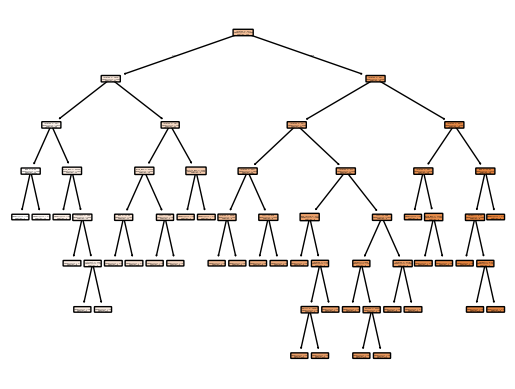

In [133]:


tree.plot_tree(RegDec, feature_names = ["horizon","amount", "price_Buy", "Volatility_Buy", " inflation ", " inflation", "ESG_ranking", "EPS "," net profit","current", "roa", "roe" ], filled = True, rounded= True)


In [134]:
import matplotlib.style  as mplstyle


mplstyle.use("fast")


In [80]:
plt.show()

## 

In [173]:
 #from sklearn.tree import export_graphviz
#graphic = export_graphviz(RegDec, feature_names = ["horizon","amount", "price_Buy", "Volatility_Buy", "expected return"," inflation", "ESG_ranking", "EPS "," net profit","current", "roa", "roe" ], filled = True, rounded= True)


In [78]:
#import graphviz


#Visual = graphviz.Source(graphic)

#Visual.render("decision_tree_regressor")
#Visual.View()

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH